In [26]:
%load_ext autoreload
%autoreload 2
import timeit
import pickle
import numpy as np
import matplotlib.pyplot as plt
from shape import Shape, Block, plot_hulls
from convex_hulls_graph import HullGraph
from shapely.geometry import Point, Polygon
from shapely.affinity import rotate
import shapely.ops as ops
from shape_boat import ShapeBoat, ShapeBoat_spline, check_vertex_constraints
%autoreload 2
from shapeshift_trajectory import shapeshift_trajectory, write_experiment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Composing Shapes from Blocks

In [52]:
shape_1a = Shape([Block(0,0)])
shape_1b = Shape([Block(0,0,90)])
shape_2a = Shape([Block(-.5,0),   Block(.5,0)])
shape_2b = Shape([Block(0,0.25),  Block(0,-0.25)])
shape_2c = Shape([Block(-.25,0,90),Block(0.25,0,90)])
shape_2d = Shape([Block(0,-.5,90) ,Block(0,.5,90)])
shape_3a = Shape([Block(-.5,0),   Block(.5,0),   Block(-1.25,0.25,90)])
shape_3b = Shape([Block(-.5,0),   Block(.5,0,0), Block(-.5,0.5)])
shape_3c = Shape([Block(0,0),     Block(-1,0),   Block(1,0)])
shape_4a = Shape([Block(-.5,0),   Block(.5,0),   Block(-1.25,0.25,90),Block(1.25,0.25,90)])
shape_4b = Shape([Block(-.5,-.25),Block(-.5,.25),Block(.5,-.25),      Block(.5,.25)])
shape_6a = Shape([Block(0,0),     Block(1.,0),   Block(0,0.5),        Block(-1.,0.5),Block(1.,0.5),Block(1.,-.5)])


tests = {'line_to_L':         (shape_1a, shape_2a, (-2.5, 0.,   0.),    (-1,     .5,   0.)),  \
         'T_to_block':        (shape_1a, shape_3b, (-1.5, 0.,   0.),    (.5,     .5,   0.)),  \
         'line_to_block':     (shape_2a, shape_2a, (-2.,  0.,   0.),    (0.,     .5,   0.)),  \
         'line_to_L2':        (shape_2a, shape_2a, (-2.,  0.,   0.),    (-1.25, .75,  90.)),  \
         'U_to_block':        (shape_3a, shape_3a, (2.5,  0.,   0.),    (0.,     .5, 180.)),  \
         'line_to_block2':    (shape_4b, shape_4b, (-2.,  0.,   0.),    (0.,     1.,   0.)),  \
         'triangle_to_block': (shape_6a, shape_6a, ( 0.,-0.5, 180.),    (0.,    1.5, 180.)),  \
         'past':              (shape_1a, shape_4a, (-5.,  0.,   0.),    (5.,     0.,   0.))   \
        }

boats = {'line':ShapeBoat, 'spline':ShapeBoat_spline}

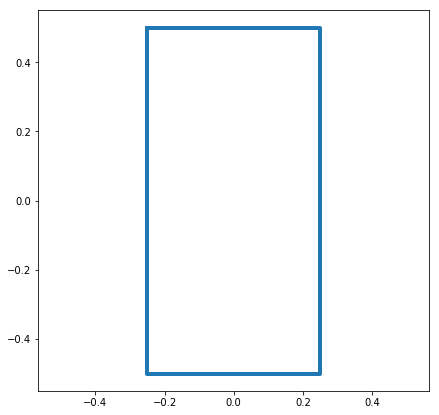

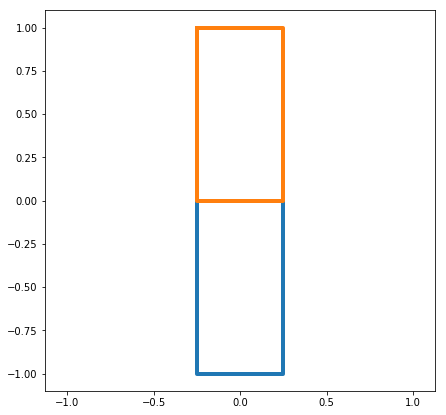

In [58]:
moving_shape=shape_1b
obstacle_shape=shape_2d

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)

### Partitioning of convex hulls around shape

In [37]:
msums, hulls = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

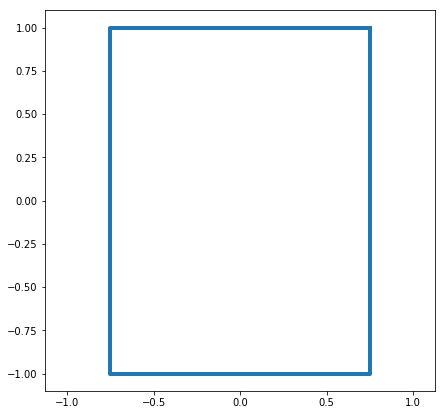

In [38]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

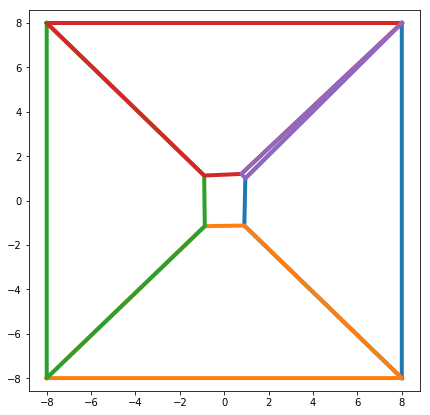

In [39]:
moving_shape.plot_polygons(hulls.values()[3])

## Trajectory Planning

### MIQP - b-splines

finding_vertex POINT (-0.75 0) 0.0
finding_vertex POINT (0 1) 0.0
found path endpoint hulls 26 28
INITIALIZED ShapeBoat_spline 
boats_S:(1, 17, 6), boats_U:(1, 16, 4)
Number of decision vars 246
0.003271 seconds
ADDING COSTS
Number of costs 18
0.008710 seconds
ADDING CONSTRAINTS
Number of constraints 1424
0.301759 seconds
PLANNING
SolutionResult.kSolutionFound
2.946415 seconds



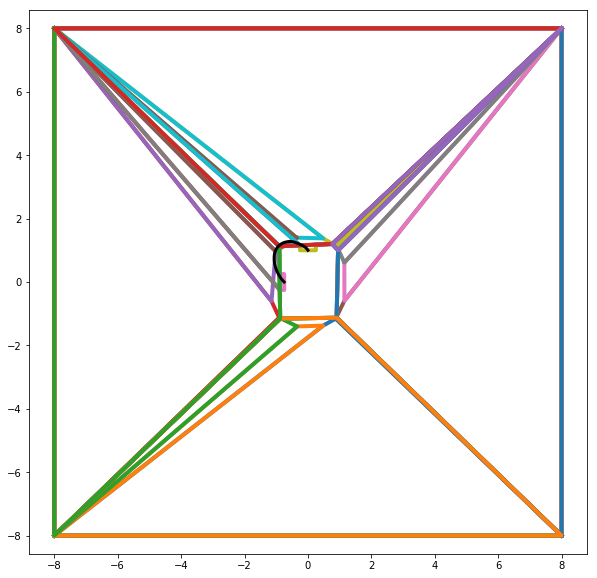

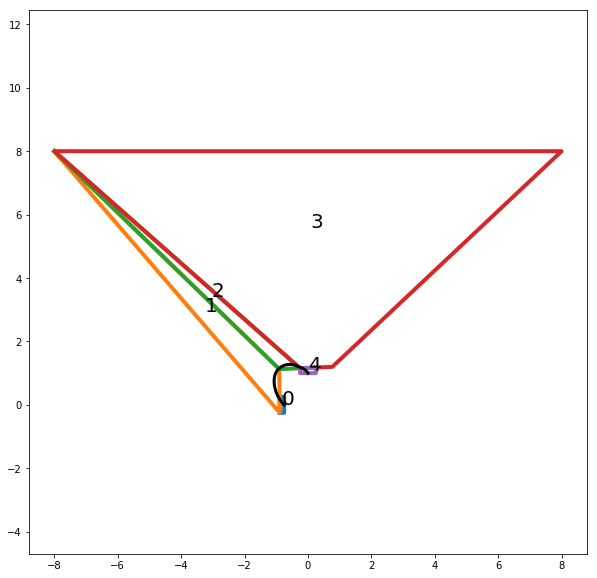

{'S': array([[[-7.50000000e-01,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-7.50018858e-01,  1.96864062e-05,  0.00000000e+00,
          -3.77168353e-05,  3.93728125e-05,  0.00000000e+00],
         [-7.50075434e-01,  7.87456249e-05,  0.00000000e+00,
          -7.54336707e-05,  7.87456249e-05,  0.00000000e+00],
         ...,
         [-3.15978954e-05,  1.00004963e+00,  0.00000000e+00,
           3.15978954e-05, -4.96252046e-05,  0.00000000e+00],
         [-7.89947386e-06,  1.00001241e+00,  0.00000000e+00,
           1.57989477e-05, -2.48126023e-05,  0.00000000e+00],
         [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]),
 'S_init': None,
 'S_knots': array([[[-0.75      ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ],
         [-0.81034694,  0.0629965 , -0.        ,  0.        ,
           0.        , -0.        ],
         [-0.8

In [59]:
tests = {'line_to_L':         (shape_1a, shape_2a, (-2.5, 0.,   0.),    (-1,     .5,   0.)),  \
         'T_to_block':        (shape_1a, shape_3b, (-1.5, 0.,   0.),    (.5,     .5,   0.)),  \
         'line_to_block':     (shape_2a, shape_2a, (-2.,  0.,   0.),    (0.,     .5,   0.)),  \
         'line_to_L2':        (shape_2a, shape_2a, (-2.,  0.,   0.),    (-1.25, .75,  90.)),  \
         'U_to_block':        (shape_3a, shape_3a, (2.5,  0.,   0.),    (0.,     .5, 180.)),  \
         'line_to_block2':    (shape_4b, shape_4b, (-2.,  0.,   0.),    (0.,     1.,   0.)),  \
         'triangle_to_block': (shape_6a, shape_6a, ( 0.,-0.5, 180.),    (0.,    1.5, 180.)),  \
         'past':              (shape_1a, shape_4a, (-5.,  0.,   0.),    (5.,     0.,   0.)),  \
         'rss_step1':         (shape_2a, shape_1a, (-1.5, 0.,   0.),    (-0.5, -.5,   0.)),   \
         'rss_step2':         (shape_1a, shape_2b, (-1, -.25,   0.),    (-0.75, 0,   90.)),   \
         'shinkyu1':          (shape_1b, shape_2c, (-.75,  0.,   0.),    (-.25,  1,   0 )),   \
         'shinkyu2':          (shape_1b, shape_2c, (-.75,  0.,   0.),    (0,  .75,   90 )),    \
         'shinkyu3-1':        (shape_2c, shape_1b, (-.75,  0.,   0.),    (0,    1,   0)),    \
         'shinkyu3-2':        (shape_1b, shape_2d, (-.5,   .5,   0.),    (0,    1.5,    0 ))    \
        }

test = 'shinkyu3-1'

shapeshift_trajectory(*tests[test], N=16)

### Show polytope graph from plan

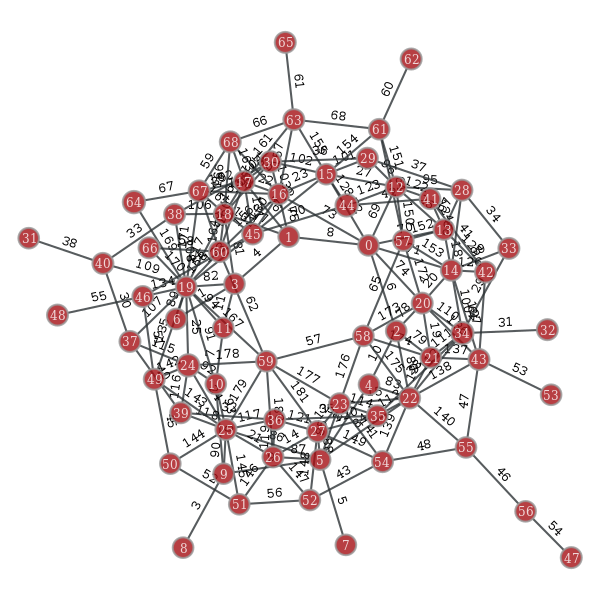

In [19]:
boat.g.draw_graph()

### Run Experiments

finding_vertex POINT (-1.5 0) 0.0
finding_vertex POINT (-0.5 -0.5) 0.0
found path endpoint hulls 38 34
INITIALIZED ShapeBoat_spline 
boats_S:(1, 17, 6), boats_U:(1, 16, 4)
Number of decision vars 246
0.002725 seconds
ADDING COSTS
Number of costs 18
0.009218 seconds
ADDING CONSTRAINTS
Number of constraints 1424
0.216608 seconds
PLANNING
SolutionResult.kSolutionFound
1.332329 seconds



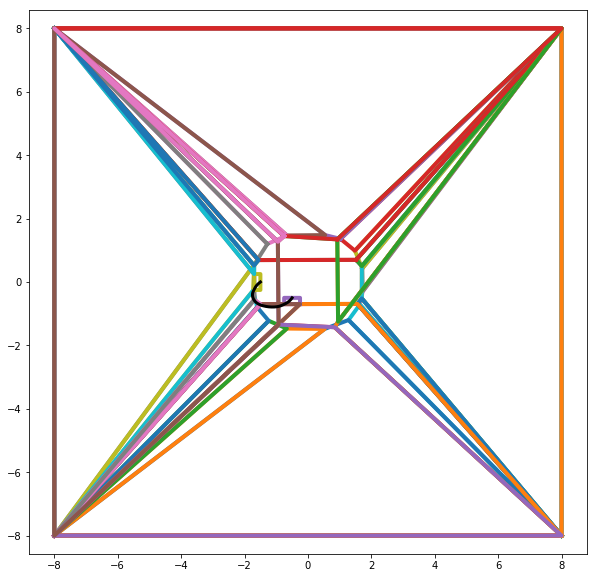

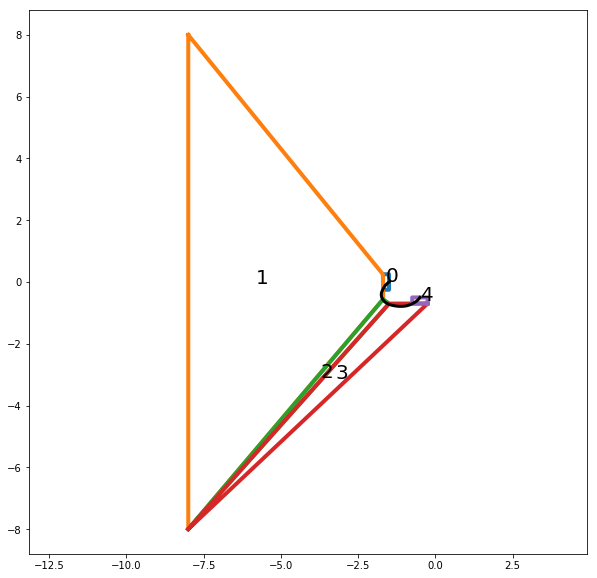

In [63]:
def result(test,boat):
    return shapeshift_trajectory(*tests[test],boat_type=boat, N=15)

#results = {boat:{test: result(test, boats[boat]) for test in tests} for boat in boats}

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
test = 'shinkyu3-2'

result = shapeshift_trajectory(*tests[test1], N=16)

save_obj(result, test)